In [30]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing import TypedDict
import os
from langgraph.checkpoint.memory import InMemorySaver

In [31]:
load_dotenv()

True

In [32]:
GROQ_API_KEY = os.environ.get('GROQ_API_KEY')

In [33]:
llm_model = ChatGroq(model="llama-3.3-70b-versatile")

In [34]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str


In [35]:
def generate_joke(state: JokeState) -> JokeState:
    
    topic = state['topic']
    
    prompt = f"Generate a joke on the topic {topic}"
    response = llm_model.invoke(prompt).content
    
    return {'joke': response}

In [36]:
def evaluate_explanation(state: JokeState) -> JokeState:
    
    joke = state['joke']
    
    prompt = f"write an explanation for the joke - {joke}"
    response = llm_model.invoke(prompt).content
    
    return {'explanation': response}

In [37]:
graph = StateGraph(JokeState)

# nodes
graph.add_node('generate_joke', generate_joke)
graph.add_node('evaluate_explanation', evaluate_explanation)

# edges
graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'evaluate_explanation')
graph.add_edge('evaluate_explanation', END)

# checkpointing
checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer) 

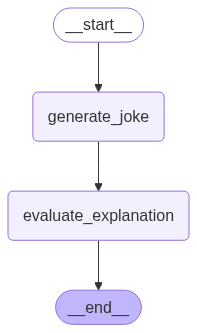

In [38]:
workflow

In [39]:
thread_id = '1'

config_1 = {'configurable': {'thread_id': thread_id}}
workflow.invoke({'topic': 'fast food'}, config=config_1)

{'topic': 'fast food',
 'joke': 'Why did the fast food burger go to therapy?\n\nBecause it was feeling a little "well done" under the pressure! (get it?)',
 'explanation': 'A clever play on words. This joke is funny because it uses a common phrase "well done" in a double sense. \n\nIn one sense, "well done" is a phrase used to describe the level of doneness for cooked meat, particularly burgers. A "well done" burger is one that is cooked thoroughly, often to the point where it\'s slightly charred or dry.\n\nHowever, the phrase "well done" can also be used to express that someone is handling a situation effectively or efficiently. For example, "You\'re doing well under the pressure" means that someone is coping with stress or difficulty in a commendable way.\n\nIn this joke, the fast food burger goes to therapy because it\'s "feeling a little well done" - implying that it\'s not just cooked to the right level, but also feeling overwhelmed or struggling to cope with the pressure (perhaps

In [40]:
workflow.get_state(config_1)

StateSnapshot(values={'topic': 'fast food', 'joke': 'Why did the fast food burger go to therapy?\n\nBecause it was feeling a little "well done" under the pressure! (get it?)', 'explanation': 'A clever play on words. This joke is funny because it uses a common phrase "well done" in a double sense. \n\nIn one sense, "well done" is a phrase used to describe the level of doneness for cooked meat, particularly burgers. A "well done" burger is one that is cooked thoroughly, often to the point where it\'s slightly charred or dry.\n\nHowever, the phrase "well done" can also be used to express that someone is handling a situation effectively or efficiently. For example, "You\'re doing well under the pressure" means that someone is coping with stress or difficulty in a commendable way.\n\nIn this joke, the fast food burger goes to therapy because it\'s "feeling a little well done" - implying that it\'s not just cooked to the right level, but also feeling overwhelmed or struggling to cope with th

In [41]:
list(workflow.get_state_history(config_1))

[StateSnapshot(values={'topic': 'fast food', 'joke': 'Why did the fast food burger go to therapy?\n\nBecause it was feeling a little "well done" under the pressure! (get it?)', 'explanation': 'A clever play on words. This joke is funny because it uses a common phrase "well done" in a double sense. \n\nIn one sense, "well done" is a phrase used to describe the level of doneness for cooked meat, particularly burgers. A "well done" burger is one that is cooked thoroughly, often to the point where it\'s slightly charred or dry.\n\nHowever, the phrase "well done" can also be used to express that someone is handling a situation effectively or efficiently. For example, "You\'re doing well under the pressure" means that someone is coping with stress or difficulty in a commendable way.\n\nIn this joke, the fast food burger goes to therapy because it\'s "feeling a little well done" - implying that it\'s not just cooked to the right level, but also feeling overwhelmed or struggling to cope with t

In [42]:
thread_id = '2'

config_2 = {'configurable': {'thread_id': thread_id}}
workflow.invoke({'topic': 'italian lasagna'}, config=config_2)

{'topic': 'italian lasagna',
 'joke': 'Why did the Italian lasagna go to therapy?\n\nBecause it had a lot of "layered" issues! (get it?)',
 'explanation': 'A clever play on words. This joke relies on a pun to create humor. Here\'s a breakdown of how it works:\n\n1. **Setup**: The joke starts by introducing an Italian lasagna as the main character, which is an unexpected twist since lasagna is a type of food, not a living being that can go to therapy.\n2. **Punchline**: The lasagna goes to therapy because it has "layered" issues. This phrase has a double meaning:\n\t* In psychology, "layered issues" can refer to complex problems that have multiple underlying causes or factors, much like an onion with many layers.\n\t* In the context of lasagna, "layered" literally refers to the dish\'s structure, which consists of multiple layers of pasta, sauce, cheese, and other ingredients.\n3. **Wordplay**: The humor comes from the clever connection between the psychological concept of "layered issu

In [43]:
workflow.get_state(config_2)

StateSnapshot(values={'topic': 'italian lasagna', 'joke': 'Why did the Italian lasagna go to therapy?\n\nBecause it had a lot of "layered" issues! (get it?)', 'explanation': 'A clever play on words. This joke relies on a pun to create humor. Here\'s a breakdown of how it works:\n\n1. **Setup**: The joke starts by introducing an Italian lasagna as the main character, which is an unexpected twist since lasagna is a type of food, not a living being that can go to therapy.\n2. **Punchline**: The lasagna goes to therapy because it has "layered" issues. This phrase has a double meaning:\n\t* In psychology, "layered issues" can refer to complex problems that have multiple underlying causes or factors, much like an onion with many layers.\n\t* In the context of lasagna, "layered" literally refers to the dish\'s structure, which consists of multiple layers of pasta, sauce, cheese, and other ingredients.\n3. **Wordplay**: The humor comes from the clever connection between the psychological conce

In [44]:
list(workflow.get_state_history(config_2))

[StateSnapshot(values={'topic': 'italian lasagna', 'joke': 'Why did the Italian lasagna go to therapy?\n\nBecause it had a lot of "layered" issues! (get it?)', 'explanation': 'A clever play on words. This joke relies on a pun to create humor. Here\'s a breakdown of how it works:\n\n1. **Setup**: The joke starts by introducing an Italian lasagna as the main character, which is an unexpected twist since lasagna is a type of food, not a living being that can go to therapy.\n2. **Punchline**: The lasagna goes to therapy because it has "layered" issues. This phrase has a double meaning:\n\t* In psychology, "layered issues" can refer to complex problems that have multiple underlying causes or factors, much like an onion with many layers.\n\t* In the context of lasagna, "layered" literally refers to the dish\'s structure, which consists of multiple layers of pasta, sauce, cheese, and other ingredients.\n3. **Wordplay**: The humor comes from the clever connection between the psychological conc

### Time Travel in LangGraph

In [45]:
workflow.get_state(
    {
        "configurable": {
            "thread_id": "2", 
            "checkpoint_id": "1f06edf8-a3bf-68ee-8000-b5bd27c72b8b"
        }
    }
)

StateSnapshot(values={'topic': 'italian lasagna'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f06edf8-a3bf-68ee-8000-b5bd27c72b8b'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-01T13:58:02.443390+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f06edf8-a3bf-68ed-bfff-0510cb860d08'}}, tasks=(PregelTask(id='d4eb6327-3eb5-5187-58c5-fdd4bd745cb1', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the Italian lasagna go to therapy?\n\nBecause it had a lot of "layered" issues! (get it?)'}),), interrupts=())

In [46]:
workflow.invoke(
    None, {
        "configurable": {
            "thread_id": "2", 
            "checkpoint_id": "1f06edf8-a3bf-68ee-8000-b5bd27c72b8b"
        }
    }
)

{'topic': 'italian lasagna',
 'joke': 'Why was the Italian lasagna in therapy?\n\nBecause it had a lot of "layered" issues! (get it?)',
 'explanation': 'The joke relies on a play on words to create humor. "Layered issues" has a double meaning here:\n\n1. **Literal meaning**: Lasagna is a type of Italian dish characterized by its layered structure, with sheets of pasta, sauce, and cheese stacked on top of each other. So, in this sense, the joke is making a literal reference to the physical composition of the lasagna.\n\n2. **Figurative meaning**: In psychology, "layered issues" is a metaphorical expression used to describe complex emotional or psychological problems that have multiple underlying causes or factors. These issues can be deeply ingrained and may require therapy to resolve. The phrase suggests that the problem is multifaceted and composed of various interconnected components, much like the layers of a lasagna.\n\nThe punchline "it had a lot of \'layered\' issues" is funny be

In [48]:
list(workflow.get_state_history(config_2))

[StateSnapshot(values={'topic': 'italian lasagna', 'joke': 'Why was the Italian lasagna in therapy?\n\nBecause it had a lot of "layered" issues! (get it?)', 'explanation': 'The joke relies on a play on words to create humor. "Layered issues" has a double meaning here:\n\n1. **Literal meaning**: Lasagna is a type of Italian dish characterized by its layered structure, with sheets of pasta, sauce, and cheese stacked on top of each other. So, in this sense, the joke is making a literal reference to the physical composition of the lasagna.\n\n2. **Figurative meaning**: In psychology, "layered issues" is a metaphorical expression used to describe complex emotional or psychological problems that have multiple underlying causes or factors. These issues can be deeply ingrained and may require therapy to resolve. The phrase suggests that the problem is multifaceted and composed of various interconnected components, much like the layers of a lasagna.\n\nThe punchline "it had a lot of \'layered\'

### Updating State

In [49]:
workflow.update_state(
    {
        "configurable": {
            "thread_id": "2", 
            "checkpoint_id": "1f06edf8-a3bf-68ee-8000-b5bd27c72b8b",
            "checkpoint_ns": ""
        }
    },
    {
        'topic':'italian aghetti',
    }
)

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f06f03d-55ce-62de-8001-739665f1def0'}}

In [50]:
list(workflow.get_state_history(config_2))

[StateSnapshot(values={'topic': 'italian aghetti'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f06f03d-55ce-62de-8001-739665f1def0'}}, metadata={'source': 'update', 'step': 1, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-01T18:17:50.370479+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f06edf8-a3bf-68ee-8000-b5bd27c72b8b'}}, tasks=(PregelTask(id='a2308e71-938c-06b0-bb4d-9aa4cfe470a2', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'italian lasagna', 'joke': 'Why was the Italian lasagna in therapy?\n\nBecause it had a lot of "layered" issues! (get it?)', 'explanation': 'The joke relies on a play on words to create humor. "Layered issues" has a double meaning here:\n\n1. **Literal meaning**: Lasagna is a type of Italian dish characterized by its la

In [52]:
workflow.invoke(
    None, {
        "configurable": {
            "thread_id": "2", 
            "checkpoint_id": "1f06f03d-55ce-62de-8001-739665f1def0"
        }
    }
)

{'topic': 'italian aghetti',
 'joke': 'Why did the Italian spaghetti refuse to get married?\n\nBecause it was afraid of getting tangled up in a lifelong commitment!',
 'explanation': 'A deliciously clever joke. Let\'s break it down:\n\nThe joke is a play on words, using the physical properties of spaghetti (a type of Italian noodle) to make a humorous comment on marriage. The punchline "it was afraid of getting tangled up in a lifelong commitment" has a double meaning:\n\n1. **Literal meaning**: Spaghetti is a long, thin, and flexible noodle that can easily become tangled or knotted. In this sense, the joke is saying that the spaghetti is afraid of getting physically tangled up, which is a clever and silly idea.\n2. **Figurative meaning**: The phrase "getting tangled up" is also an idiom that means to become deeply involved or entangled in a complicated situation. In the context of marriage, "a lifelong commitment" refers to the idea that marriage is a long-term, binding agreement betw